In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("energy_consumption_dataset_950.csv")
df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,Night,Fri,25.365429
1,38.767858,69.902200,0.078444,1,Afternoon,Thu,37.330928
2,33.299849,40.522277,11.414861,2,Afternoon,Sat,29.352114
3,29.966462,84.864717,0.529670,1,Morning,Fri,34.962693
4,18.900466,55.126231,11.186007,4,Evening,Wed,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,Morning,Tue,20.466653
946,18.422141,66.959127,11.813236,7,Evening,Sat,23.335067
947,37.500466,41.281484,3.765021,5,Morning,Sat,36.134230
948,36.847252,51.323074,8.461110,3,Morning,Mon,37.149819


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i]=label.fit_transform(df[i])

df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,3,0,25.365429
1,38.767858,69.902200,0.078444,1,0,4,37.330928
2,33.299849,40.522277,11.414861,2,0,2,29.352114
3,29.966462,84.864717,0.529670,1,2,0,34.962693
4,18.900466,55.126231,11.186007,4,1,6,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,2,5,20.466653
946,18.422141,66.959127,11.813236,7,1,2,23.335067
947,37.500466,41.281484,3.765021,5,2,2,36.134230
948,36.847252,51.323074,8.461110,3,2,1,37.149819


In [4]:
x=df.drop("energy_consumption",axis=1)
y=df["energy_consumption"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week
936,15.459767,30.559897,14.898825,8,0,1
290,15.762506,82.117390,3.904303,1,1,5
544,30.453206,66.206916,6.606620,7,3,4
275,27.537907,68.311557,12.555617,3,0,3
109,16.924498,67.650328,7.313568,4,2,3
...,...,...,...,...,...,...
106,25.259573,76.031297,6.746098,9,2,4
270,35.234029,87.051814,10.294908,9,0,0
860,34.388190,69.618163,2.209546,4,0,3
435,32.524228,49.511404,5.757583,5,2,2


In [6]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [7]:
y_pred=model.predict(x_test)
y_pred


array([33.47204886, 23.09536369, 30.01333537, 30.51467726, 24.3929822 ,
       28.23770907, 29.19729243, 25.45443204, 32.48079641, 31.76222968,
       30.26634406, 25.41677923, 23.98404876, 37.33843832, 28.30888451,
       33.47204886, 38.47698904, 24.12805068, 34.27006576, 34.60135586,
       38.88811254, 33.08550389, 29.44793462, 33.01485053, 27.46360893,
       21.65792864, 34.47394366, 25.31146263, 35.05380375, 32.64416103,
       20.34800994, 33.63454151, 34.3342862 , 28.47738219, 37.54476837,
       24.40873254, 21.65792864, 36.02521778, 24.35092814, 37.24513357,
       32.22712321, 34.53607729, 31.80490063, 24.64627633, 35.986265  ,
       19.24320567, 25.66819596, 23.54086247, 36.04059509, 34.60135586,
       23.54158362, 29.7932324 , 39.23594159, 36.20123831, 22.95310641,
       28.33000119, 22.99735468, 23.09536369, 27.21982624, 24.14422827,
       32.02461729, 37.35352775, 27.72901739, 25.7235098 , 38.88811254,
       25.41677923, 32.26371265, 34.7430739 , 24.02624359, 29.07

In [8]:
msc=mean_squared_error(y_test,y_pred)
print(f"mean_squared_error:{msc}")

rmsc=np.sqrt(msc)
print(f"sqrt:{rmsc}")


mean_squared_error:7.693896161443882
sqrt:2.7737873316899915


In [9]:
score=r2_score(y_test,y_pred)
score

0.8110082623559118

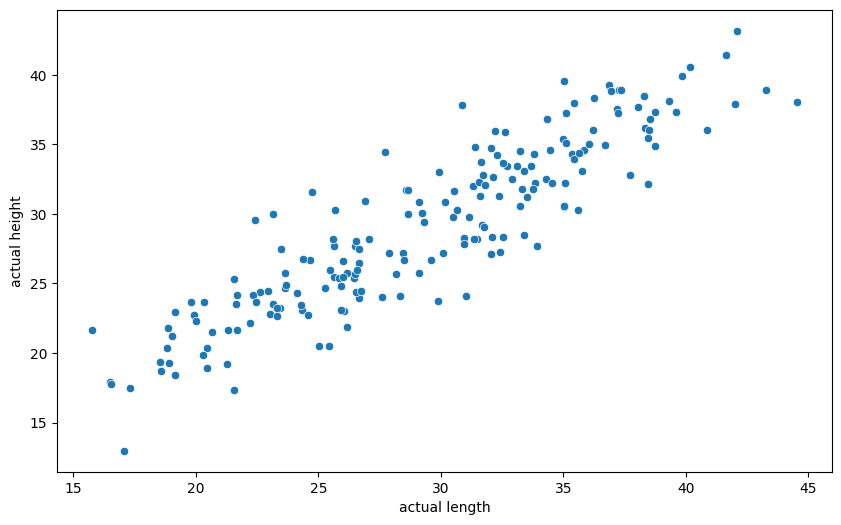

In [10]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("actual length")
plt.ylabel("actual height")
plt.show()